# **`Car Price Prediction Based on Consumer Traits`**
#### STAT 301 Project Group 22 Project Proposal
##### *By Janice Chan, Elias Khan, Davis Li, Daniel Yuan*

#### Introduction

One of our team members, Davis, is studying business and works at a Honda retailer selling cars. We found this car dataset from Kaggle that stood out to us because it is directly correlated to what we’re interested in. As a salesman, it is important to gauge how much a client is willing to pay for a car to make the best suggestions. This dataset helps us answer that question by providing input variables (demographics/attributes of a buyer) to predict the response variable (price they paid for the car). 

##### Question:
The key question we inquire is: “what attributes of a buyer can best predict how much a buyer is willing to pay for a car?”. As our project is based on prediction, we want to predict: “based on attributes of a buyer/consumer, how much would they be willing to pay for a car?”.

##### Dataset:
“Car Sales Price Prediction” from Kaggle: https://www.kaggle.com/datasets/yashpaloswal/ann-car-sales-price-prediction (Yashpal, n.d.), consisting of 500 observations.

The input variables are: customer name, customer email, country, gender, age, annual salary, credit card debt, and net worth.

The response variable is: the amount paid for a car by the buyer

##### Relevant Research
From previous studies, we know that the attributes of buyers affect how much they spend on a car. A scientific study by Chandra et al. (2013) describes that older buyers spend more on a car; a trend particularly illustrated in women, indicating that the gender and age of the buyer affect how much they pay for the car.
Another study found that income influenced the choice of car price; not gender or age (Rimple et al., 2015).

However, the study by Chandra et al. (2013) does not consider consumers' income/wealth, and the study by Rimple et al. (2015) was limited to a small sample size of 164 respondents in India. Thus, our research will expand on previous studies to gain a better understanding of how customer's traits may affect how much a buyer would spend on a car with a larger and more diverse dataset; providing a better model for prediction and knowledge of the relationship between buyers and their car purchases.


#### Methods

The first important step is to load in the libraries we will need to analyse the dataset and setting the seed for reproducability:

In [1]:
set.seed(1234)

library(tidyverse)
library(repr)
library(digest)
library(infer)
library(broom)
library(leaps)
library(mltools)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.0      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘mltools’


The following object is masked from ‘package:tidyr’:

    replace_na




Now we can load in the dataset:

In [2]:
raw_car_data <- read_csv("car_purchasing.csv")
head(raw_car_data)

Rows: 500 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): customer name, customer e-mail, country
dbl (6): gender, age, annual Salary, credit card debt, net worth, car purcha...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.85172,62812.09,11609.381,238961.3,35321.46
Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.87062,66646.89,9572.957,530973.9,45115.53
Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradipiscing.co.uk,Algeria,1,43.15290,53798.55,11160.355,638467.2,42925.71
Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.27137,79370.04,14426.165,548599.1,67422.36
Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.31375,59729.15,5358.712,560304.1,55915.46
Carla Hester,mi@Aliquamerat.edu,Liberia,1,56.82489,68499.85,14179.472,428485.4,56612.00


Before we begin analyzing the data, it's important to decide which columns are important for our research and whether or not the data is clean.

Our first course of action will be to change the names of columns so that there are no spaces or symbols like "-" that will hinder our ability to analyze the data.

In [3]:
colnames(raw_car_data) <- gsub(" ", "_", colnames(raw_car_data))
colnames(raw_car_data) <- gsub("-", "", colnames(raw_car_data))
head(raw_car_data)

customer_name,customer_email,country,gender,age,annual_Salary,credit_card_debt,net_worth,car_purchase_amount
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.85172,62812.09,11609.381,238961.3,35321.46
Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.87062,66646.89,9572.957,530973.9,45115.53
Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradipiscing.co.uk,Algeria,1,43.15290,53798.55,11160.355,638467.2,42925.71
Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.27137,79370.04,14426.165,548599.1,67422.36
Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.31375,59729.15,5358.712,560304.1,55915.46
Carla Hester,mi@Aliquamerat.edu,Liberia,1,56.82489,68499.85,14179.472,428485.4,56612.00


Next we must change the gender column so that it is categorical, rather than numerical.

In [4]:
raw_car_data$gender[raw_car_data$gender == 0] <- "Male"
raw_car_data$gender[raw_car_data$gender == 1] <- "Female"
raw_car_data$gender = as.factor(raw_car_data$gender)

head(raw_car_data)

customer_name,customer_email,country,gender,age,annual_Salary,credit_card_debt,net_worth,car_purchase_amount
<chr>,<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,Male,41.85172,62812.09,11609.381,238961.3,35321.46
Harlan Barnes,eu.dolor@diam.co.uk,Belize,Male,40.87062,66646.89,9572.957,530973.9,45115.53
Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradipiscing.co.uk,Algeria,Female,43.15290,53798.55,11160.355,638467.2,42925.71
Jade Cunningham,malesuada@dignissim.com,Cook Islands,Female,58.27137,79370.04,14426.165,548599.1,67422.36
Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,Female,57.31375,59729.15,5358.712,560304.1,55915.46
Carla Hester,mi@Aliquamerat.edu,Liberia,Female,56.82489,68499.85,14179.472,428485.4,56612.00


Finally, we must remove the columns "customer name", "customer e-mail", and "country", as they will be not included in our research.

These columns vary far too much and it would be nearly impossible to make any meaningful remarks from them.

In [5]:
car_data <- raw_car_data %>% select(-customer_name, -customer_email, -country)
head(car_data)

gender,age,annual_Salary,credit_card_debt,net_worth,car_purchase_amount
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Male,41.85172,62812.09,11609.381,238961.3,35321.46
Male,40.87062,66646.89,9572.957,530973.9,45115.53
Female,43.15290,53798.55,11160.355,638467.2,42925.71
Female,58.27137,79370.04,14426.165,548599.1,67422.36
Female,57.31375,59729.15,5358.712,560304.1,55915.46
Female,56.82489,68499.85,14179.472,428485.4,56612.00


Now we have clean data with only categorical and numerical values, we can begin analyzing the data.

We will first create a distribution of car purchase amounts to see how the amount people spend on cars varies overall.

In [6]:
mean_purchases = mean(car_data$car_purchase_amount) %>%
    round(digits = 2)
median_purchases = median(car_data$car_purchase_amount) %>%
    round(digits = 2)
sd_purchases = sd(car_data$car_purchase_amount) %>%
    round(digits = 2)

##### Table 1. Data Summary of Estimates (rounded)
| Mean car purchase amount | Median car purchase amount | Standard Deviation of car purchase amounts|
|------|--------|------|
| \$44209.80 | \$43997.78 | \$10773.18 |

In [7]:
quantile_purchases = quantile(car_data$car_purchase_amount) %>%
    round(digits = 2)

##### Table 2. Quantiles of Car Purchases (rounded)
| 0% | 25% | 50% | 75% | 100% |
|------|--------|------|------|------|
| 9000 | 37629.90 | 43997.78 | 51254.71 | 80000 |

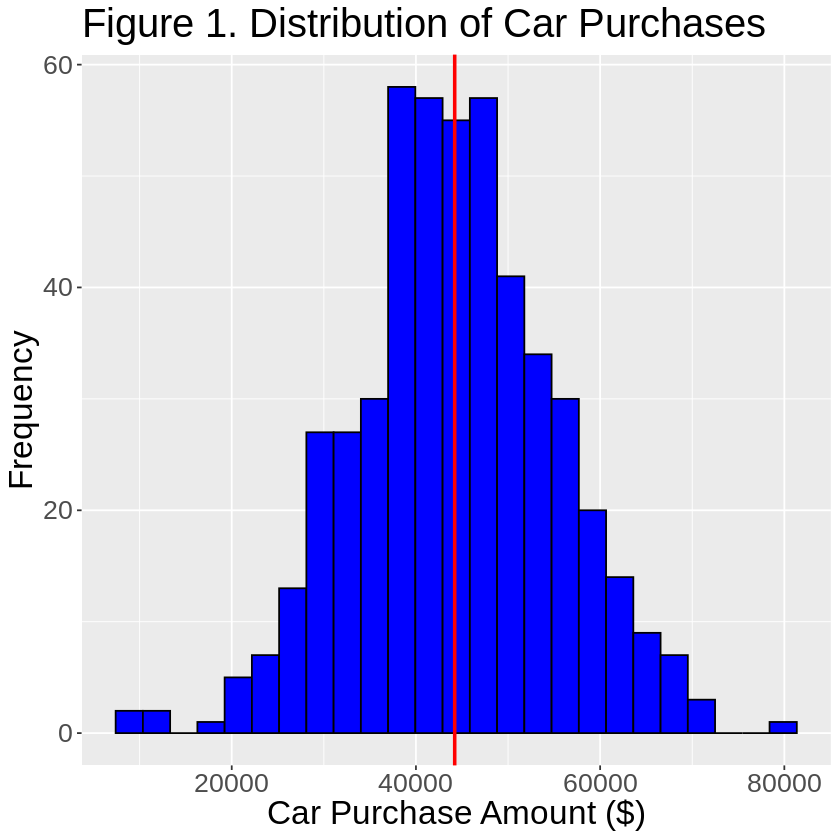

In [8]:
mean_purchase = mean(car_data$car_purchase_amount)

car_data %>% ggplot(aes(x=car_purchase_amount)) +
    geom_histogram(bins = 25, color = "black", fill = "blue") +
    geom_vline(xintercept= mean_purchase, color = "red", size = 1) +
    xlab("Car Purchase Amount ($)") +
    ylab("Frequency") +
    ggtitle("Figure 1. Distribution of Car Purchases") +
    theme(text = element_text(size = 20))

These statistics combined with the visualisation above give us some valuable information about our data:

1. The distribution of car purchases is relatively symmetrical. We can see this visually, and we can confirm this by observing that the mean (44209.80 dollars) and the median (43997.78 dollars) are very close in value. This tells us that there are roughly the same amount of people that spend more than the mean than those who spend less.

2. 50% of the purchases lie between 37629.90 and 51254.71 dollars. This indicates to us that the amount that customers spend doesn't vary that much since the upper and lower quartile are relatively close. This is also shown in how high the peak of the distribution is compared to the outer sections of the distribution.

Now that we've become a bit more familiar with our response variable, we can begin seeing how other variables in the dataset compare and correlate with our response variable.

In [9]:
head(car_data)

gender,age,annual_Salary,credit_card_debt,net_worth,car_purchase_amount
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Male,41.85172,62812.09,11609.381,238961.3,35321.46
Male,40.87062,66646.89,9572.957,530973.9,45115.53
Female,43.15290,53798.55,11160.355,638467.2,42925.71
Female,58.27137,79370.04,14426.165,548599.1,67422.36
Female,57.31375,59729.15,5358.712,560304.1,55915.46
Female,56.82489,68499.85,14179.472,428485.4,56612.00


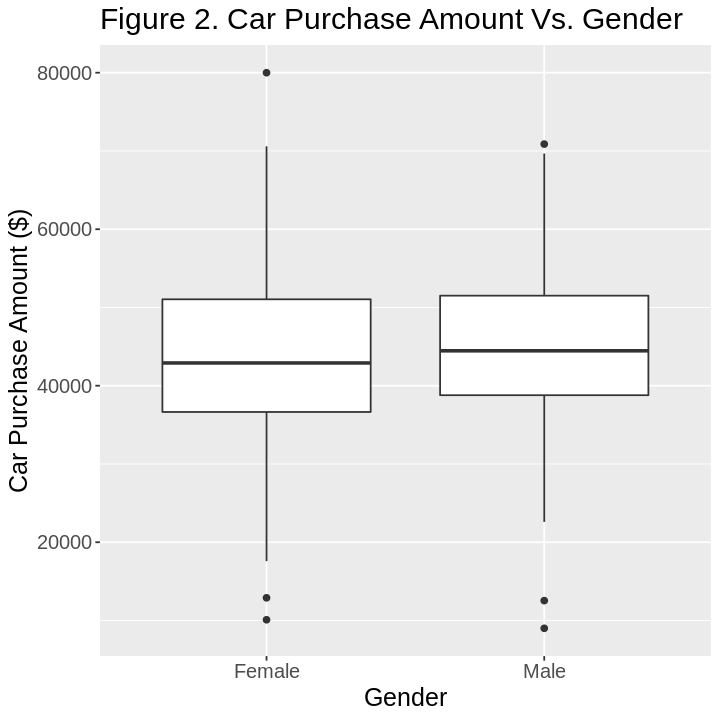

In [10]:
options(repr.plot.width = 6, repr.plot.height = 6)

gender_plot <- car_data %>% ggplot(aes(x = gender, y = car_purchase_amount)) +
                    geom_boxplot() +
    xlab("Gender")+
    ylab("Car Purchase Amount ($)")+
    ggtitle("Figure 2. Car Purchase Amount Vs. Gender") +
    theme(text = element_text(size = 15))


gender_plot

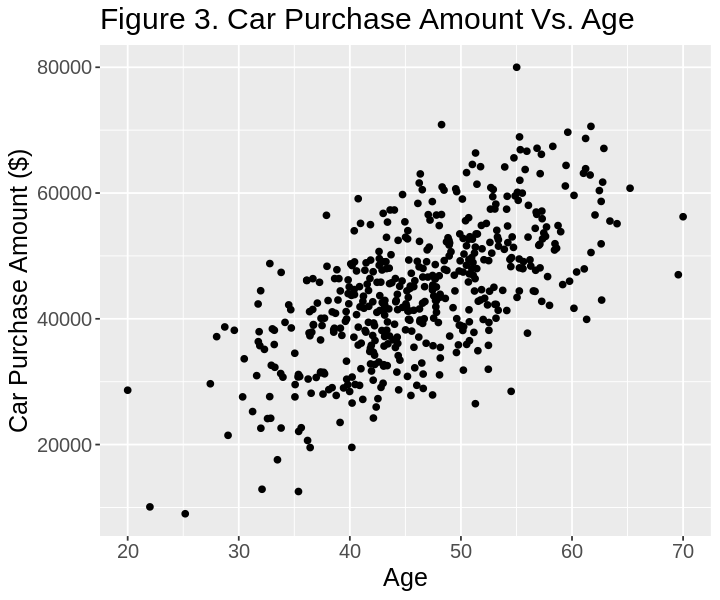

In [11]:
options(repr.plot.width = 6, repr.plot.height = 5)

age_plot <- car_data %>% ggplot(aes(x = age, y = car_purchase_amount)) +
                    geom_point() +
    xlab("Age")+
    ylab("Car Purchase Amount ($)")+
    ggtitle("Figure 3. Car Purchase Amount Vs. Age") +
    theme(text = element_text(size = 15))

age_plot

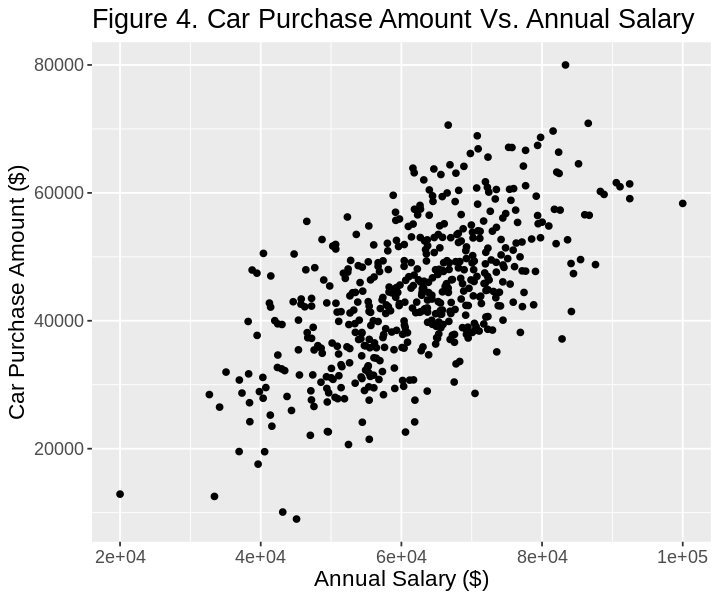

In [12]:
options(repr.plot.width = 6, repr.plot.height = 5)

annual_Salary_plot <- car_data %>% ggplot(aes(x = annual_Salary, y = car_purchase_amount)) +
                    geom_point() +
    xlab("Annual Salary ($)")+
    ylab("Car Purchase Amount ($)")+
    ggtitle("Figure 4. Car Purchase Amount Vs. Annual Salary") +
    theme(text = element_text(size = 13.5))

annual_Salary_plot

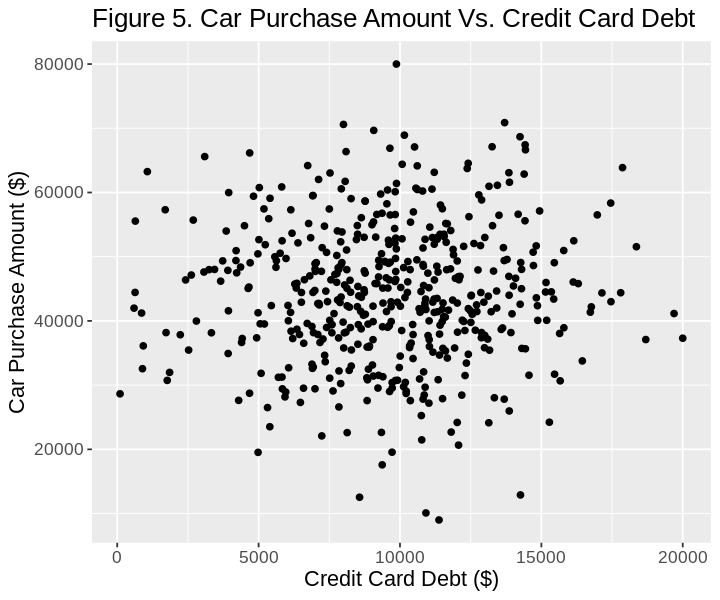

In [13]:
options(repr.plot.width = 6, repr.plot.height = 5)

credit_card_debt_plot <- car_data %>% ggplot(aes(x = credit_card_debt, y = car_purchase_amount)) +
                    geom_point() +
    xlab("Credit Card Debt ($)")+
    ylab("Car Purchase Amount ($)")+
    ggtitle("Figure 5. Car Purchase Amount Vs. Credit Card Debt") +
    theme(text = element_text(size = 13))

credit_card_debt_plot

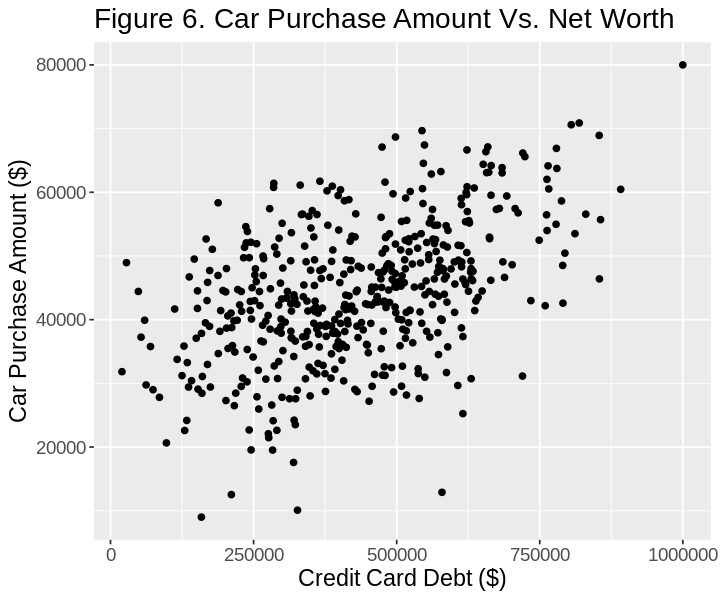

In [14]:
options(repr.plot.width = 6, repr.plot.height = 5)

net_worth_plot <- car_data %>% ggplot(aes(x = net_worth, y = car_purchase_amount)) +
                    geom_point() +
    xlab("Credit Card Debt ($)")+
    ylab("Car Purchase Amount ($)")+
    ggtitle("Figure 6. Car Purchase Amount Vs. Net Worth") +
    theme(text = element_text(size = 14))

net_worth_plot

After visualizing how different variables stack against car purchase amount, it is safe to say that we will definitely be able to make a solid predictive model for our response variable. More than one of these plot figures shows a strong positive correlation to the response variable, which gives us the confidence to end our exploratory analysis of the data and begin preparing to fully analyze it and build models.

We start by splitting our dataset into a training and testing set; creating the training set by sampling without replacement with 60% of observations in our dataset and using anti_join() and 'ID' to create our testing set.

In [15]:
car_data$ID <- 1:nrow(car_data)
training_car <- sample_n(car_data, size = nrow(car_data) * 0.60, replace = FALSE)

testing_car <- anti_join(car_data, training_car, by = "ID")

head(training_car, 3)
nrow(training_car)

head(testing_car, 3)
nrow(testing_car)

gender,age,annual_Salary,credit_card_debt,net_worth,car_purchase_amount,ID
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Female,40.87537,59060.09,5841.612,136346.31,29417.65,284
Male,61.31742,51086.88,12254.539,59630.08,39911.61,336
Male,45.75423,63172.96,6332.202,456524.79,45112.95,406


[1] 300

gender,age,annual_Salary,credit_card_debt,net_worth,car_purchase_amount,ID
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Male,41.85172,62812.09,11609.381,238961.3,35321.46,1
Female,43.15290,53798.55,11160.355,638467.2,42925.71,3
Female,57.31375,59729.15,5358.712,560304.1,55915.46,5


[1] 200

Then we estimate an additive MLR with all input variables in our cleaned dataset.

In [16]:
car_full_OLS <- lm(car_purchase_amount ~ ., data = training_car[,-7])

tidy(car_full_OLS)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-4.214698e+04,7.146126e-01,-5.897878e+04,0.0000000
genderMale,9.911072e-02,1.702344e-01,5.822016e-01,0.5608771
age,8.415575e+02,1.017777e-02,8.268581e+04,0.0000000
annual_Salary,5.623342e-01,7.383222e-06,7.616379e+04,0.0000000
credit_card_debt,-1.051798e-05,2.445774e-05,-4.300470e-01,0.6674765
net_worth,2.898336e-02,4.928031e-07,5.881327e+04,0.0000000


We then obtain the out-of-sample predictions for the testing set.

In [17]:
car_test_pred_full_OLS <- predict(car_full_OLS, newdata = testing_car[,-7])
head(car_test_pred_full_OLS)

1        2        3        4        5        6 
35320.91 42926.24 55913.02 28924.15 47434.85 48011.75

Now we calculate the RMSE for the above predictions with respect to the testing set's observed car purchase amount ($).

In [18]:
car_R_MSE_models <- tibble(
  Model = "OLS Full Regression",
  R_MSE = rmse(
    preds = car_test_pred_full_OLS,
    actuals = testing_car$car_purchase_amount
  )
)
car_R_MSE_models

Model,R_MSE
<chr>,<dbl>
OLS Full Regression,1.520315


Then we run the forward selection algorithm for the models for 1 to 5 input variables.

In [19]:
car_forward_sel <- regsubsets(
  x = car_purchase_amount ~ ., nvmax = 5,
  data = training_car[,-7],
  method = "forward",
)

car_forward_summary <- summary(car_forward_sel)
car_forward_summary

Subset selection object
Call: regsubsets.formula(x = car_purchase_amount ~ ., nvmax = 5, data = training_car[, 
    -7], method = "forward", )
5 Variables  (and intercept)
                 Forced in Forced out
genderMale           FALSE      FALSE
age                  FALSE      FALSE
annual_Salary        FALSE      FALSE
credit_card_debt     FALSE      FALSE
net_worth            FALSE      FALSE
1 subsets of each size up to 5
Selection Algorithm: forward
         genderMale age annual_Salary credit_card_debt net_worth
1  ( 1 ) " "        "*" " "           " "              " "      
2  ( 1 ) " "        "*" "*"           " "              " "      
3  ( 1 ) " "        "*" "*"           " "              "*"      
4  ( 1 ) "*"        "*" "*"           " "              "*"      
5  ( 1 ) "*"        "*" "*"           "*"              "*"      

From the above models, we select our model with the best goodness of fit which we will evaluate from the C<sub>p</sub> statistic of our metrics.

In [20]:
car_forward_summary_df <- tibble(
    n_input_variables = 1:5,
    RSQ = car_forward_summary$rsq,
    RSS = car_forward_summary$rss,
    ADJ.R2 = car_forward_summary$adjr2,
    Cp = car_forward_summary$cp,
    BIC = car_forward_summary$bic,
)
car_forward_summary_df

n_input_variables,RSQ,RSS,ADJ.R2,Cp,BIC
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.4393132,2.088299e+10,0.4374317,9.742405e+09,-162.1703
2,0.7992297,7.477767e+09,0.7978777,3.488553e+09,-464.5668
3,1.0000000,6.313310e+02,1.0000000,2.530700e+00,-5345.0739
4,1.0000000,6.305898e+02,1.0000000,4.184940e+00,-5339.7225
5,1.0000000,6.301934e+02,1.0000000,6.000000e+00,-5334.2074


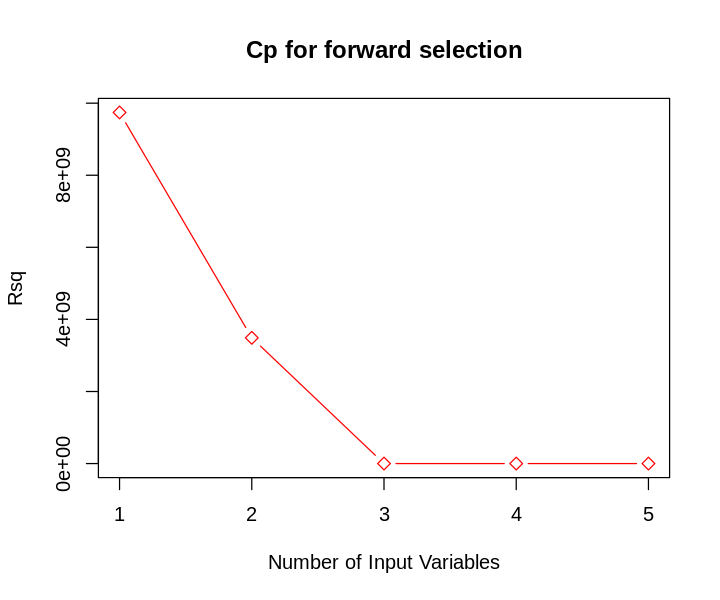

In [21]:
plot(summary(car_forward_sel)$cp,
  main = "Cp for forward selection",
  xlab = "Number of Input Variables", ylab = "Rsq", type = "b", pch = 5,
  col = "red")

We notice that the C<sub>p</sub> statistic is decreasing until 3 variables, thus we select a predictive model with 3 variables, which are age, annual salary, and net worth by our models fit from the forward selection algorithm.

In [22]:
# Estimation
car_red_OLS <- lm(car_purchase_amount ~ age + annual_Salary + net_worth,
  data = training_car)

# Prediction
car_test_pred_red_OLS <- predict(car_red_OLS, newdata = testing_car[, 1:5])
head(car_test_pred_red_OLS)

1        2        3        4        5        6 
35320.87 42926.30 55913.03 28924.16 47434.92 48011.63

We compute the new RMSE of this new predictive model using the testing set.

In [23]:
car_R_MSE_models <- rbind(
  car_R_MSE_models,
  tibble(
    Model = "OLS Reduced Regression",
    R_MSE = rmse(
      preds = car_test_pred_red_OLS,
      actuals = testing_car$car_purchase_amount)))
car_R_MSE_models

Model,R_MSE
<chr>,<dbl>
OLS Full Regression,1.520315
OLS Reduced Regression,1.519226


#### (old methods section)
From our dataset, we will assess multiple linear regression models and select input variables using forward stepwise selection. We will evaluate the model's predicted performance with the root mean squared error, assess goodness of fit with the adjusted R<sup>2</sup>, and select our predictive model by the C<sub>p</sub> statistic. The dataset will be split into a training set and testing set. Then we will generate a model from the training set, and use it to predict values in the test set to test our model's prediction performance.

From our research, we expect to achieve an understanding of the attributes that contribute to car prices that consumers would spend on; gaining an optimal model of characteristics that affect car spendings which will allow us to estimate and predict cars for consumers by price. This may impact how car suggestions are offered depending on the characteristics of clients, and how automobile creators can decide on cars to make with a certain sale price for a particular audience. It also provides greater insight into consumer behaviour and cars likely to perform well sales-wise. Our study can also be expanded in research with characteristics of cars (not just consumers) to discover car types and/or qualities that impact how much certain consumers spend.

#### Results

#### Discussion

#### References

Chandra, A., Gulati, S., & Sallee, J. M. (2017). Who loses when prices are negotiated? an analysis of the new car market. *The Journal of Industrial Economics, 65*(2), 235-274. https://doi.org/10.1111/joie.12125.

Rimple, M., Srikant, M., Naseem, A., & Jitendra Kumar, M. (2015). A study of interaction of materialism and money attitude and its impact on car purchase. *Management & Marketing, 10*(3), 245-269. https://doi.org/10.1515/mmcks-2015-0017.

Yashpal. (n.d.). ANN - Car Sales Price Prediction, Version 1. Retrieved November 3, 2022 from https://www.kaggle.com/datasets/yashpaloswal/ann-car-sales-price-prediction.